In [1]:
import string
import random
import math
from fuzzywuzzy import fuzz
from difflib import *
import time

/home/entropy/.local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

class Agent:

    def __init__(self, length):

        self.params = [random.uniform(2,4),random.uniform(0.1,4)] #(a,d) 
        self.fitness = -1

#     def __str__(self):

#         return 'Params: ' + str(self.params) + ' Fitness: ' + str(self.fitness)

def init_agents(population, length):
    return [Agent(length) for _ in range(population)]

def ga():

    agents = init_agents(population, in_str_len)

    for generation in range(generations):

#         print('Generation: ' + str(generation))

        temp_fitness = []
        
        agents = fitness(agents)

        for agent in agents:
            temp_fitness.append(agent.fitness)

        # print(temp_fitness)

        current_max_fitness = max(temp_fitness)

        count = temp_fitness.count(current_max_fitness)

#         print('Current_max_fitness',current_max_fitness)
#         print('Count: ',count)

        if count/len(agents) >= 0.5 and current_max_fitness >= 90:
#             print('Bazinga!')
            break

        agents = selection(agents)
        agents = crossover(agents)
        agents = mutation(agents)



def ani_jackard(s1,s2):
    str1 = [ord(i) for i in s1]
    str2 = [ord(i) for i in s2]

    str1 = set(str1)
    str2 = set(str2)

    score = (str1 & str2)
    score_u = str1|str2

    return 100-(len(score)/len(score_u))*100


def fitness(agents):

    for agent in agents:

        a = agent.params[0]
        d = agent.params[1]

        cipher = encrypt(plaintext,a,d)

        # agent.fitness = 100-fuzz.ratio(plaintext,cipher)
        agent.fitness = ani_jackard(plaintext,cipher)

    return agents

def selection(agents):
    agents = sorted(agents, key=lambda agent: agent.fitness, reverse=True)
#     print('\n'.join(map(str, agents)))
    agents = agents[:int(0.2 * len(agents))]
    return agents

def crossover(agents):

    offspring = []

    for _ in range((population - len(agents)) // 2):

        parent1 = random.choice(agents)
        parent2 = random.choice(agents)
        child1 = Agent(2)
        child2 = Agent(2)
        # split = random.randint(0, in_str_len)
        child1.params = [parent1.params[0],parent2.params[1]]
        child2.params = [parent2.params[0],parent1.params[1]]

        offspring.append(child1)
        offspring.append(child2)

    agents.extend(offspring)

    return agents

def mutation(agents):
        
    for agent in agents:

        step_a = random.uniform(-0.2,0.2)
        step_d = random.uniform(-0.2,0.2)
        
        if random.uniform(0.0, 1.0) <= 0.1:

            agent.params[0] += step_a
            agent.params[1] += step_d

    return agents

def chaotic_map(n,x_0,y_0,a,d):
    # d = 0.3
    # a = 2.5 
    x=[]
    x.append(x_0)
    y = []
    y.append(y_0)

    for i in range(n-1):
        x.append((x[i]+d+(a*math.sin(2*math.pi*y[i])))%1)
        y.append(1 - a*pow(x[i],2) + y[i])

    return (x,y)

def float_to_shuffled_ints(x,y):
    x_sorted = sorted(x, reverse=True)
    y_sorted = sorted(y, reverse=True)

    shuffled_x = []
    for x_val in x:
        if x_val in x_sorted:
            i = x_sorted.index(x_val)
            shuffled_x.append(i)

    shuffled_y = []
    for y_val in y:
        if y_val in y_sorted:
            i = y_sorted.index(y_val)
            shuffled_y.append(i)


    # print('shuffled_x = ',shuffled_x)
    # print('shuffled_y = ',shuffled_y)

    key = []
    for i in shuffled_x:
        key.append(shuffled_y[i])

    return key



def encrypt(plaintext,a,d):
    ascii_lst = [ord(i) for i in plaintext]
    n = len(ascii_lst)

    ascii_avg = sum(ascii_lst)/n

    x_0 = ascii_avg/max(ascii_lst)
    y_0 = 0.2
    (x,y) = chaotic_map(n,x_0,y_0,a,d)

    private_key = float_to_shuffled_ints(x,y)
    # print('Private Key = ',private_key)

    ciphertext = []
    for i in range(len(ascii_lst)):
        ciphertext.append(chr(ascii_lst[i]+private_key[i]))

    # print('CipherText = ',ciphertext)
    return ''.join(ciphertext)

def genesis(plaintext):
    ga()

In [3]:
in_str = None
in_str_len = None
population = 20
generations = 10000

In [4]:
messages = []
length = 100
num_strings = 10
for i in range(num_strings):
    messages.append(''.join(random.choice(string.ascii_letters) for _ in range(length)))
print(messages)

['aOBWXXJbblaZQNYUgkDJQSSbXTjiPgORudOorzwLyAPUeDHVyxCgjWUhLyvjKTLtFxlYQXeMzZHvIkchngTPKyXcaBteMmgvRuGs', 'gSqnYuxRDbrNANqDCCfwLOaNtvxjdMuWfyqwckvficRfpmZBbqZZqvzCxYjRIjNPiTDAuKzUXLyBLRHZtaqxVEONJnjyDHFibkhS', 'GSIpYUhwxkxxvuqecLbLoVppFyFcgARsiwKfayJaDjKNVQNSVoceNEoYkqGaEcRDKbtUhWYjqOCnEzzXnBwiWNocasCiasWqBYsi', 'uCOyVUAQRTuDdfdjyGvBFwbjXIiRtCFGFdizswMCsCvquNyfOMRYPxmQlXcMYOVplPWFiBjhAGZRtjSokPqIofHdpIqxEmUOwouB', 'ifMnAYJqLuChXjpGwWimqqRlXsjceHaCDxmSJsnbhNwqnecHEDTqcjXIHECbtuJODgyAHRtUeSDApeUEgnolFTJNLXaJKDQYbYsB', 'qUIbenjfAljERTqicBztzuFvPyUgENwaVQvcQCBZXOKVjjiaBBAjVxODwYMfWgmtpUtsYriSpdkiFSCMSZaKmreHnJGeVQNGazAz', 'wQEZNrbvoMsFjXADqEGhjxxjWaqiZYsaSqlouqxwdDAvgXfJPVULjIgCkPHirQuKjRTGdkEqXAdpNLlyBfKNMDfYpipVmPnwrmbc', 'bbFAsIWnGQPGUgbkxHoxLecOKfpuHqfBQMBRsnGJDMAvHbysPxTrxvPDffLlMCNHqaIfRMwAkRasrhSUxMAGwhtTaoEAAMwWDiLu', 'NnTwYjjzUXIbexZdojnUvKmdtrQhFMQcOwhdrWtnijMakDeKyYNfbTfimWvvVlQLCKeLFCbKmZRtrbHXjjOdmRsWQztElVTbqAkB', 'VBhmdBFkniKtSbIPbVUPGjMpGpaEotsCNQiFDRlBKYaVPchOHVHljFiavPPlNk

In [5]:
time_taken = []
for plaintext in messages:
    t1 = time.time()
    genesis(plaintext)
    t2 = time.time()
    print('Runtime: ',t2-t1)
    time_taken.append(t2-t1)


Runtime:  4.157045364379883
Runtime:  1.8858706951141357
Runtime:  0.511336088180542
Runtime:  0.7046515941619873
Runtime:  4.0319859981536865
Runtime:  22.22178363800049
Runtime:  2.812734603881836
Runtime:  7.032604455947876
Runtime:  0.29700207710266113
Runtime:  1.5677995681762695


In [6]:
message_length = []
for i in range(num_strings):
    message_length.append(i)
print(message_length)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


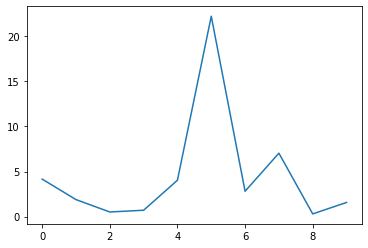

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(message_length, time_taken)